<img src="./files/img/banistmo.png"\>

# Modulo 1: ¿Como resolver problemas de clasificación?

<p>Los problemas de clasificación involucran predecir a que categorias pertenece una observación.</p>

</p>Tipos de problemas de clasificación que aprenderemos:</p>

<ul>
  <li>Clasificación Binaria: Ejemlo: Predecir si un cliente pagará o no a fin de mes.</li>
  <li>Clasificación Multiclase: Ejemlo: Predecir si un cliente pertenece a un segmento A, segmento B, Segmento C...</li>
</ul>

<p>La clase se encuentra en: </p>
Para mas informacion leer [Moro et al., 2014]
https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("files/dataset/class_01/bank-additional-full.csv", delimiter=";")
print(df.shape)
df.head()

(41188, 21)


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

 # Inputs:
<ol>
    <li>age (numeric)</li>
    <li>job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")</li>
    <li>marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)</li>
    <li>education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")</li>
    <li>default: has credit in default? (categorical: "no","yes","unknown")</li>
    <li>housing: has housing loan? (categorical: "no","yes","unknown")</li>
    <li>loan: has personal loan? (categorical: "no","yes","unknown")</li>
    <li>contact: contact communication type (categorical: "cellular","telephone") </li>
    <li>month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")</li>
    <li>day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")</li>
    <li>duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</li>
    <li>campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
    <li>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)</li>
    <li>previous: number of contacts performed before this campaign and for this client (numeric)</li>
    <li>poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")</li>
    <li>emp.var.rate: employment variation rate - quarterly indicator (numeric)</li>
    <li>cons.price.idx: consumer price index - monthly indicator (numeric)     </li>
    <li>cons.conf.idx: consumer confidence index - monthly indicator (numeric) </li>
    <li>euribor3m: euribor 3 month rate - daily indicator (numeric)</li>
    <li>nr.employed: number of employees - quarterly indicator (numeric)</li>
</ol>

# Ouput:

<ol>
   <li> y - has the client subscribed a term deposit? (binary: "yes","no")</li>
</ol>

In [3]:
# describamos las variables continuas
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [4]:
df.describe(include=['int64'])

age      duration      campaign         pdays      previous
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000
mean      40.02406    258.285010      2.567593    962.475454      0.172963
std       10.42125    259.279249      2.770014    186.910907      0.494901
min       17.00000      0.000000      1.000000      0.000000      0.000000
25%       32.00000    102.000000      1.000000    999.000000      0.000000
50%       38.00000    180.000000      2.000000    999.000000      0.000000
75%       47.00000    319.000000      3.000000    999.000000      0.000000
max       98.00000   4918.000000     56.000000    999.000000      7.000000

In [5]:
df.describe(include=['float64'])

emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911
std        1.570960        0.578840       4.628198      1.734447     72.251528
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [6]:
#describamos las variables ctegoricas
df.describe(include=['object'])

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

In [7]:
# vemos que las variables unknown son "NaN"
[df.select_dtypes(include=['object'])[x].unique() for x in df.select_dtypes(include=['object'])]

[array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['telephone', 'cellular'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 array(['nonexistent', 'failure', 'success'], dtype=object),
 array(['no', 'yes'], dtype=object)]

## Trabajar con las variables categoricas

In [8]:
# segun las instrucciones del dataset las variables no captadas son reemplazadas con "unknown"
df_fixed  = df.applymap(lambda x: None if x =="unknown" else x)
[df_fixed[x].unique() for x in df_fixed]

[array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
        49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
        28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
        77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
        74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64),
 array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', None,
        'entrepreneur', 'student'], dtype=object),
 array(['married', 'single', 'divorced', None], dtype=object),
 array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', None, 'university.degree', 'illiterate'],
       dtype=object),
 array(['no', None, 'yes'], dtype=object),
 array(['no', 'yes', None], dtype=object),
 array(['no', 'yes', None], dtype=object),
 array(['telephone', 'cellular'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'n

In [9]:
print(df_fixed.shape)
df_fixed.isna().sum()

(41188, 21)


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [10]:
df_fixed= df_fixed.fillna("999")
print(df_fixed.shape)
df_fixed.isna().sum()

(41188, 21)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Ahora que hemos "arreglado" los datos vacios precedemos a convertir las variables categoricas a enteros. A este proceso se le llama "encoding"

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
#df_fixed.select_dtypes('object').apply(lambda x: le.fit_transform(x), axis=1)
df_fixed.select_dtypes('object').head()

job  marital    education default housing loan    contact month  \
0  housemaid  married     basic.4y      no      no   no  telephone   may   
1   services  married  high.school     999      no   no  telephone   may   
2   services  married  high.school      no     yes   no  telephone   may   
3     admin.  married     basic.6y      no      no   no  telephone   may   
4   services  married  high.school      no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no

In [13]:
df_fixed.job = le.fit_transform(df_fixed.job)
df_fixed.marital = le.fit_transform(df_fixed.marital)
df_fixed.education = le.fit_transform(df_fixed.education)
df_fixed.default = le.fit_transform(df_fixed.default)
df_fixed.housing = le.fit_transform(df_fixed.housing)
df_fixed.contact = le.fit_transform(df_fixed.contact)
df_fixed.loan = le.fit_transform(df_fixed.loan)
df_fixed.month = le.fit_transform(df_fixed.month)
df_fixed.day_of_week = le.fit_transform(df_fixed.day_of_week)
df_fixed.poutcome = le.fit_transform(df_fixed.poutcome)
df_fixed.y = le.fit_transform(df_fixed.y)

In [14]:
df_fixed.isna().sum()
df_fixed.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

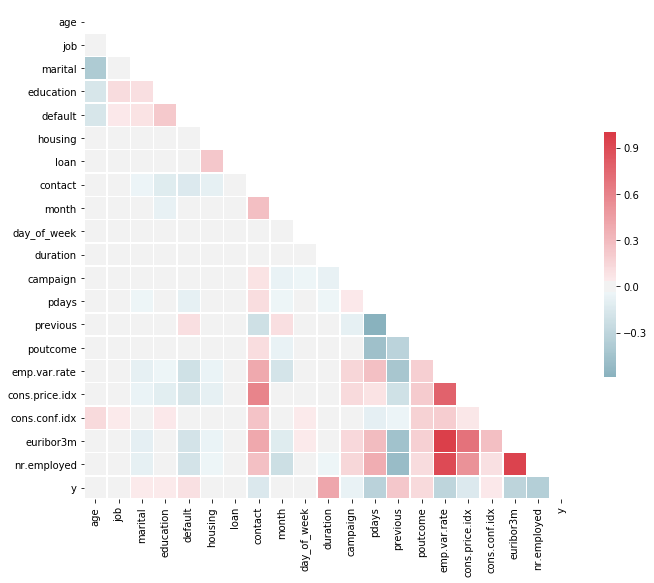

In [15]:
#mejor se ve visualizando

# calcular la matriz de correlaciones [-1,+1] 
corr = df_fixed.corr(method='pearson') # pearson, spearman y kendall

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
def color_red_or_green(val):
    color = 'red' if val > 0.9 else 'black'
    if val > 0.9 and val != 1.0:
        color = 'red'
    elif val < -0.9:
        color = 'green'
    else:
        color = 'white'
    return 'color: %s' % color
corr.style.applymap(color_red_or_green)

<p>Los pares de variables</p>
<ul>
    <li>nr.employed | emp.var.rate	 =  0.90697 </li>
    <li>euribor3m	| emp.var.rate	 =  0.972245 </li>
    <li>euribor3m	| nr.employed	 =  0.945154 </li>
</ul>

La alta correlación entre las variables indican que <b>nr.employed</b> tiene la misma informacion que <b>euribor3m</b> y <b>emp.var.rate</b>.

Por eso podemos utilizar solo <b>nr.employed</b>

In [17]:
df_fixed.drop(["euribor3m","emp.var.rate"],axis=1 , inplace=True)

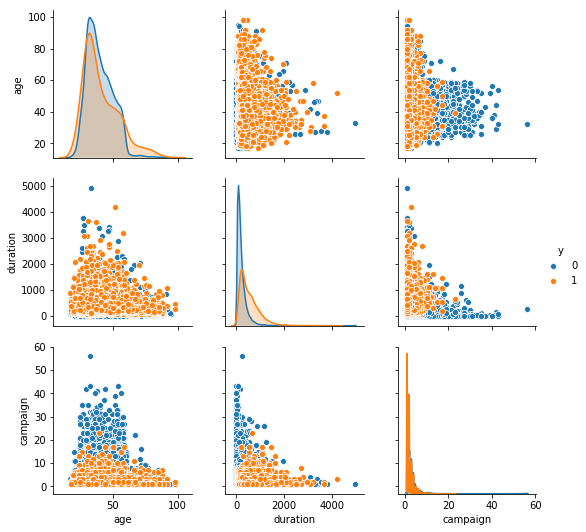

In [18]:
sns.pairplot(df_fixed, hue="y", vars=['age','duration','campaign'])

In [19]:
X = df_fixed.drop("y", axis = 1).values
y = df_fixed.y.values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    shuffle=True,
                                                    random_state=42)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(28831, 18)
(28831,)
(12357, 18)
(12357,)


In [21]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 20)]
max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [22]:
print(random_grid)

{'n_estimators': [10, 13, 17, 21, 24, 28, 32, 35, 39, 43, 46, 50, 54, 57, 61, 65, 68, 72, 76, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 3,
                               verbose=3,
                               random_state=123,
                               n_jobs = 4)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   10.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'n_estimators': [10, 13, 17, 21, 24, 28, 32, 35, 39, 43, 46, 50, 54, 57, 61, 65, 68, 72, 76, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring=No

In [24]:
print(rf_random.best_score_)
print(rf_random.best_params_)

0.9131490409628524
{'n_estimators': 72, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}


In [25]:
predicted_prob = rf_random.predict_proba(X_test)
predicted_classes = rf_random.predict(X_test)
np.sum(predicted_classes)


1091

In [26]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, predicted_classes))

Accuracy 0.9132475519948208


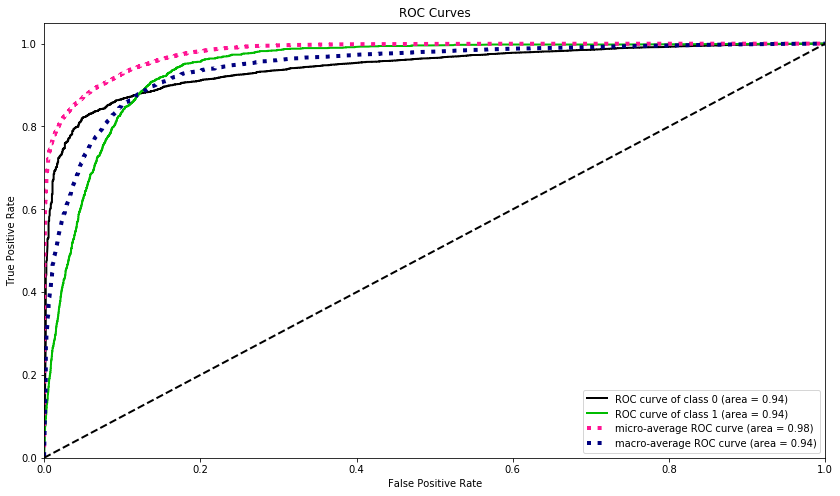

In [27]:
import scikitplot as skplt

fig, ax = plt.subplots(figsize=(14,8))
skplt.metrics.plot_roc(y_test, predicted_prob, ax=ax)


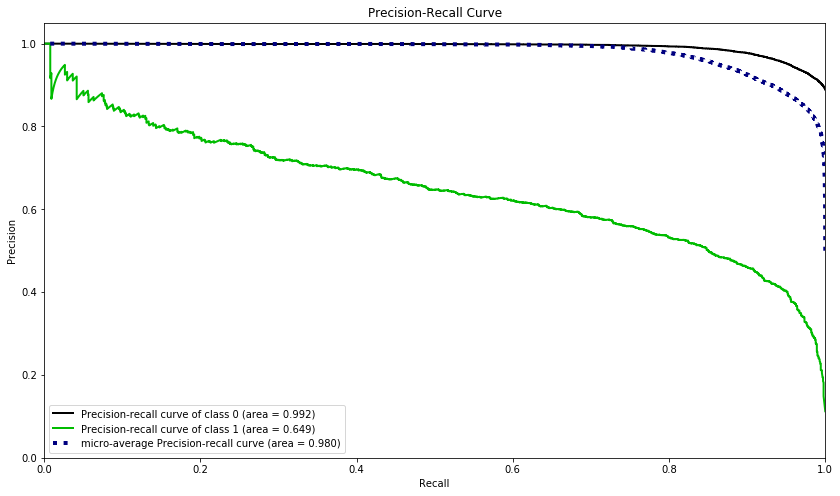

In [28]:
fig, ax = plt.subplots(figsize=(14,8))
skplt.metrics.plot_precision_recall(y_test, predicted_prob, ax=ax)

Strategy to use to generate predictions.
“stratified”: generates predictions by respecting the training set’s class distribution.
“most_frequent”: always predicts the most frequent label in the training set.
“prior”: always predicts the class that maximizes the class prior (like “most_frequent”) and predict_proba returns the class prior.
“uniform”: generates predictions uniformly at random.
“constant”: always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class

In [29]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='prior', random_state=123, constant=None)
dummy_classifier.fit(X_train, y_train)
dummy_pred = dummy_classifier.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, dummy_pred))

Accuracy:  0.8875940762320952


fig, ax = plt.subplots(figsize=(12,8))
skplt.metrics.plot_roc(y_test, dummy_classifier.predict_proba(X_test), ax=ax)

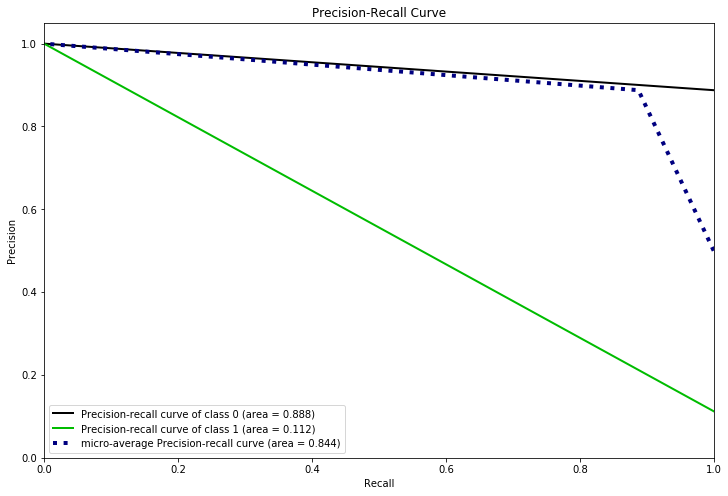

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
skplt.metrics.plot_precision_recall(y_test, dummy_classifier.predict_proba(X_test), ax=ax)

## Veamos la importancia de las variables

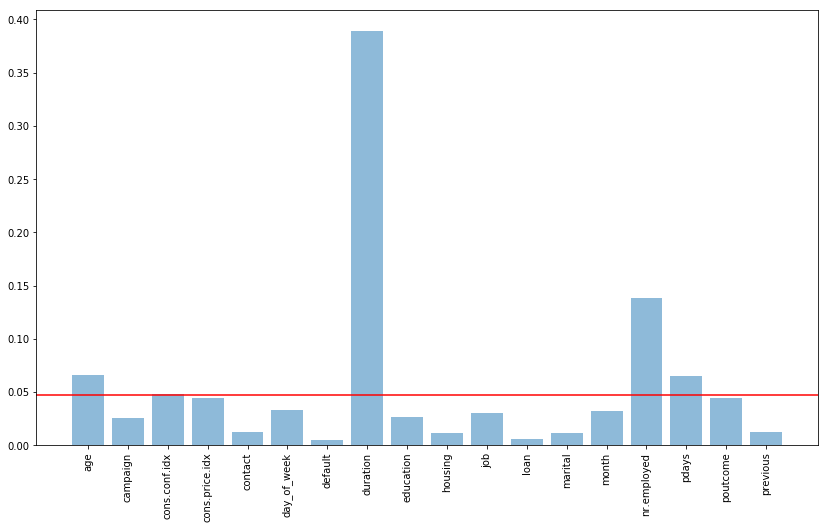

In [31]:
feat_imp_01 = rf_random.best_estimator_.feature_importances_
feat_cols_01 = df_fixed.drop('y', axis=1).columns.tolist()
fig, ax = plt.subplots(figsize=(14,8))
plt.bar(feat_cols_01, feat_imp_01, align='center', alpha=0.5)
plt.xticks(rotation=90)

top_var_01 = pd.DataFrame({'features':np.array(feat_cols_01),
                        'importance':np.array(feat_imp_01)},)

q3_01 = top_var_01['importance'].quantile(.75) # 75% and above
plt.axhline(y=q3_01, color='r', linestyle='-')


In [32]:
metrics.confusion_matrix(y_test, predicted_classes)

array([[10581,   387],
       [  685,   704]], dtype=int64)

# Ahora veamos que sucede cuando consideramos desbalance de clase

In [33]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [34]:
ros = SMOTE(random_state=123)#RandomOverSampler(random_state=123)
X_res, y_res = ros.fit_sample(X_train, y_train)

In [35]:
print(X_train.shape)
print(X_res.shape)

(28831, 18)
(51160, 18)


In [36]:
rf_2 = RandomForestClassifier()

rf_random_2 = RandomizedSearchCV(estimator = rf_2,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 3,
                               verbose=3,
                               random_state=123,
                               n_jobs = 4)
# Fit the random search model
rf_random_2.fit(X_res, y_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   14.9s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'n_estimators': [10, 13, 17, 21, 24, 28, 32, 35, 39, 43, 46, 50, 54, 57, 61, 65, 68, 72, 76, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring=No

In [37]:
print(rf_random_2.best_score_)
print(rf_random_2.best_params_)
predicted_prob_2 = rf_random_2.predict_proba(X_test)
predicted_classes_2 = rf_random_2.predict(X_test)

0.9352032838154808
{'n_estimators': 72, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 26, 'bootstrap': False}


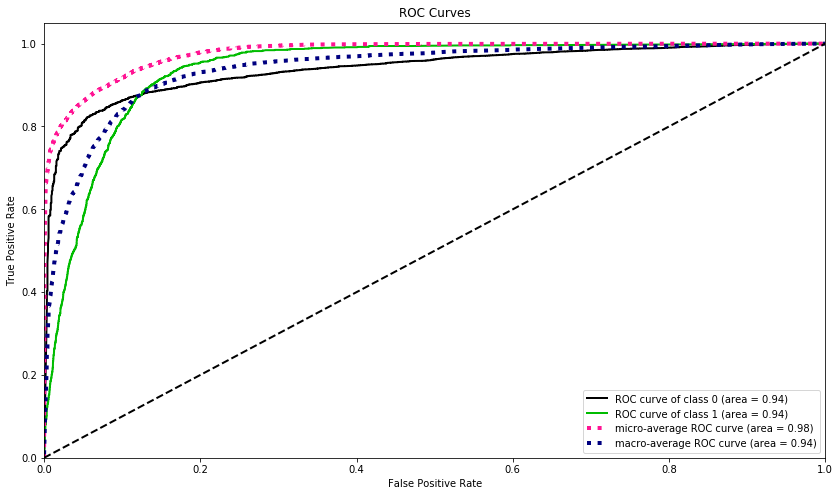

In [38]:
fig, ax = plt.subplots(figsize=(14,8))
skplt.metrics.plot_roc(y_test, predicted_prob_2, ax=ax)

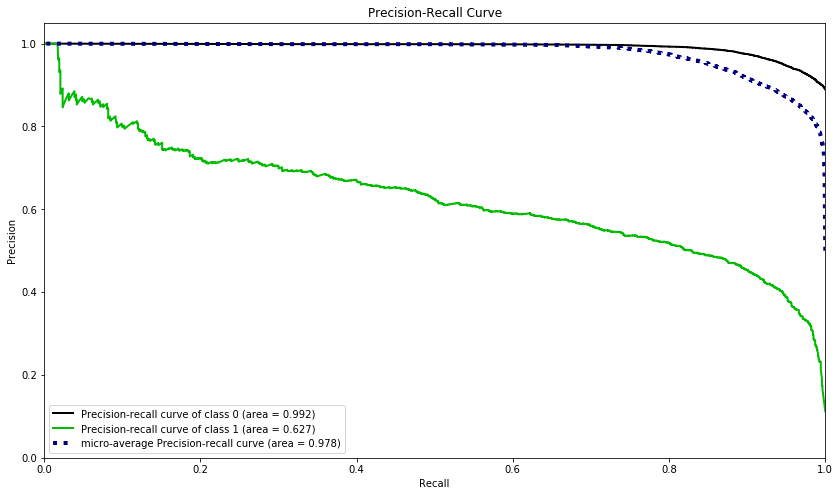

In [39]:
fig, ax = plt.subplots(figsize=(14,8))
skplt.metrics.plot_precision_recall(y_test, predicted_prob_2, ax=ax)

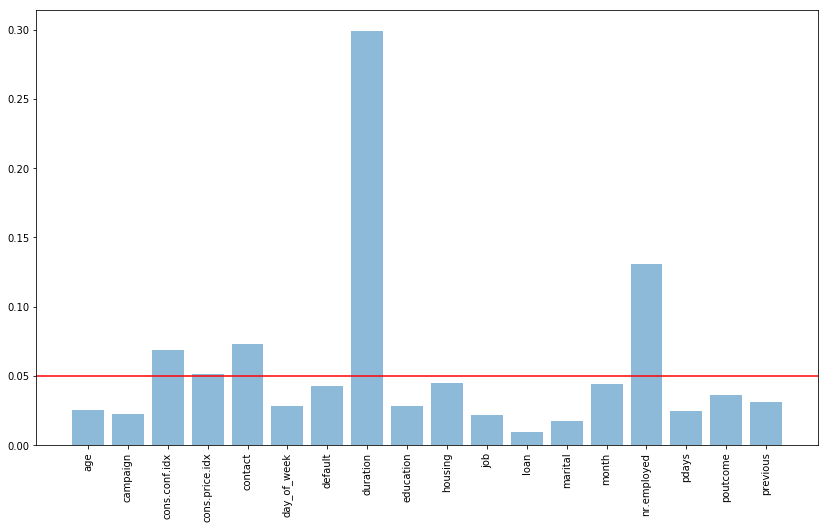

In [40]:
feat_imp_02 = rf_random_2.best_estimator_.feature_importances_
feat_cols_02 = df_fixed.drop('y', axis=1).columns.tolist()
fig, ax = plt.subplots(figsize=(14,8))
plt.bar(feat_cols_02, feat_imp_02, align='center', alpha=0.5)
plt.xticks(rotation=90)

top_var_02 = pd.DataFrame({'features':np.array(feat_cols_02),
                        'importance':np.array(feat_imp_02)},)

q3_02 = top_var_02['importance'].quantile(.75) # 75% and above
plt.axhline(y=q3_02, color='r', linestyle='-')

In [41]:
compared = top_var_01.merge(top_var_02, on='features', suffixes=('_01', '_02'))
compared

features  importance_01  importance_02
0              age       0.065977       0.025616
1              job       0.030420       0.021844
2          marital       0.011567       0.017705
3        education       0.026757       0.027989
4          default       0.005262       0.042809
5          housing       0.011603       0.045190
6             loan       0.005442       0.009802
7          contact       0.012542       0.072825
8            month       0.032238       0.043913
9      day_of_week       0.032830       0.028012
10        duration       0.389168       0.298970
11        campaign       0.025278       0.022498
12           pdays       0.064845       0.024403
13        previous       0.012035       0.031131
14        poutcome       0.044442       0.036358
15  cons.price.idx       0.043991       0.051213
16   cons.conf.idx       0.047730       0.068816
17     nr.employed       0.137873       0.130907

In [42]:
compared['01-02']=compared['importance_02']-compared['importance_01']
compared

features  importance_01  importance_02     01-02
0              age       0.065977       0.025616 -0.040361
1              job       0.030420       0.021844 -0.008576
2          marital       0.011567       0.017705  0.006138
3        education       0.026757       0.027989  0.001232
4          default       0.005262       0.042809  0.037546
5          housing       0.011603       0.045190  0.033587
6             loan       0.005442       0.009802  0.004360
7          contact       0.012542       0.072825  0.060283
8            month       0.032238       0.043913  0.011675
9      day_of_week       0.032830       0.028012 -0.004818
10        duration       0.389168       0.298970 -0.090198
11        campaign       0.025278       0.022498 -0.002781
12           pdays       0.064845       0.024403 -0.040442
13        previous       0.012035       0.031131  0.019096
14        poutcome       0.044442       0.036358 -0.008084
15  cons.price.idx       0.043991       0.051213  0.007223
16   cons.conf.idx       0.047730       0.068816  0.021086
17     nr.employed       0.137873       0.130907 -0.006966

# Ahora un modelo solo con las variables mas importantes

In [43]:
def get_subset_by_IQR(df,column):
    q1 = df[column].quantile(0.75)
    q3 = df[column].quantile(1.)
    iqr = (df[column] >= q1) & (df[column] <= q3)
    return df.loc[iqr]


vars_iqr = get_subset_by_IQR(top_var_01,'importance')
vars_iqr

features  importance
0             age    0.065977
10       duration    0.389168
12          pdays    0.064845
16  cons.conf.idx    0.047730
17    nr.employed    0.137873

In [44]:
df_fixed_top = df_fixed[vars_iqr.features.values]
X_top = df_fixed_top.values
y_top = df_fixed.y.values
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top,
                                                    test_size=0.30,
                                                    shuffle=True,
                                                    random_state=42)

In [45]:
ros = RandomOverSampler(random_state=123)#RandomOverSampler(random_state=123)
X_res_top, y_res_top = ros.fit_sample(X_train_top, y_train_top)

In [46]:
rf_3 = RandomForestClassifier()

rf_random_3 = RandomizedSearchCV(estimator = rf_3,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 3,
                               verbose=3,
                               random_state=123,
                               n_jobs = 4)
# Fit the random search model
rf_random_3.fit(X_res_top, y_res_top)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    7.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'n_estimators': [10, 13, 17, 21, 24, 28, 32, 35, 39, 43, 46, 50, 54, 57, 61, 65, 68, 72, 76, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring=No

In [47]:
print(rf_random_3.best_score_)
print(rf_random_3.best_params_)
predicted_prob_3 = rf_random_3.predict_proba(X_test_top)
predicted_classes_3 = rf_random_3.predict(X_test_top)

0.9647576231430806
{'n_estimators': 17, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 42, 'bootstrap': False}


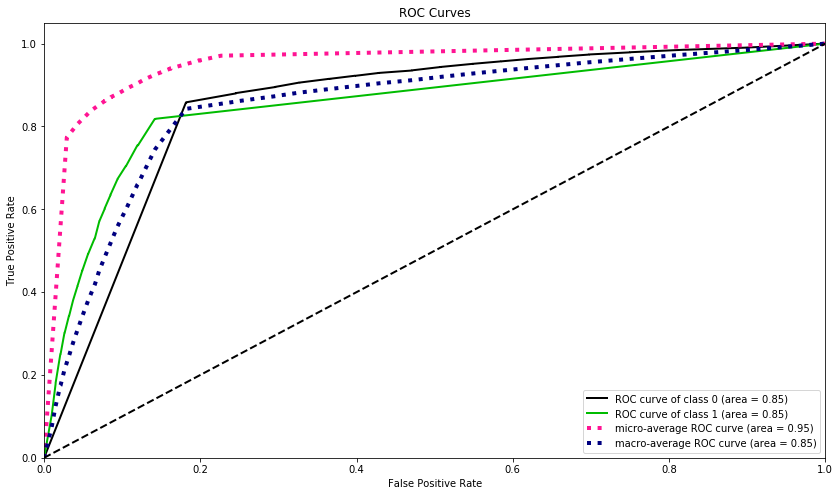

In [48]:
fig, ax = plt.subplots(figsize=(14,8))
skplt.metrics.plot_roc(y_test_top, predicted_prob_3, ax=ax)

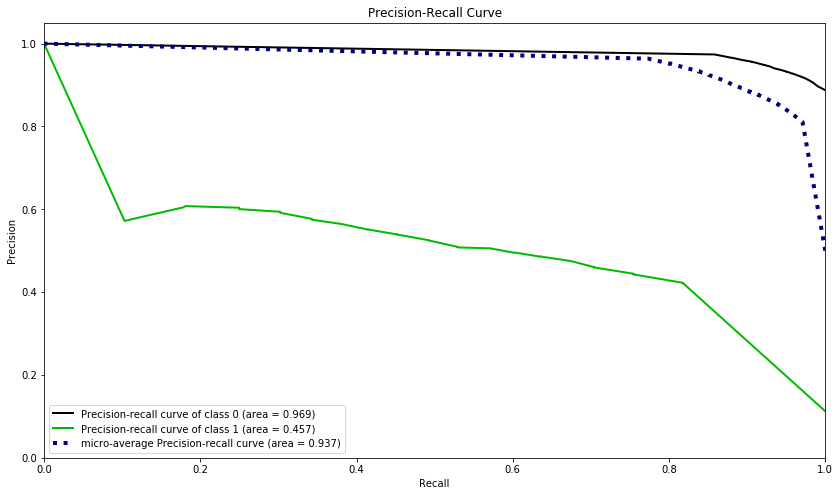

In [49]:
fig, ax = plt.subplots(figsize=(14,8))
skplt.metrics.plot_precision_recall(y_test_top, predicted_prob_3, ax=ax)

# Ahora Veamos el efecto de las variables en la prediccion

In [50]:
import shap

In [51]:
explainer = shap.TreeExplainer(rf_random_2.best_estimator_)
shap_values = explainer.shap_values(X_res[:100])

In [64]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[0][0], features=X_res[0], feature_names=df_fixed.drop("y", axis = 1).columns )

In [65]:
shap.force_plot(explainer.expected_value[1], shap_values[0], features=X_res, feature_names=df_fixed.drop("y", axis = 1).columns )

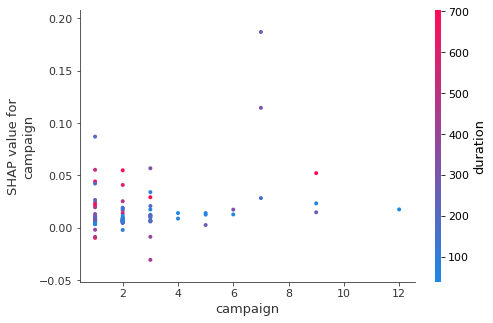

In [59]:
shap.dependence_plot("campaign", shap_values[0], pd.DataFrame(data=X_res[:100], columns=df_fixed.drop("y", axis = 1).columns.tolist()))

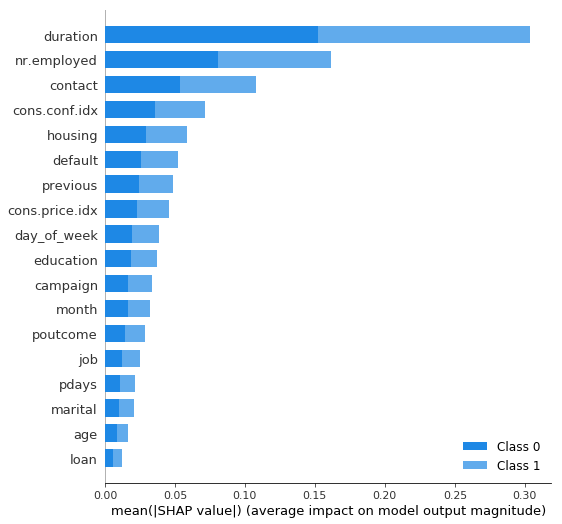

In [58]:
shap.summary_plot(shap_values, pd.DataFrame(data=X_res, columns=df_fixed.drop("y", axis = 1).columns.tolist()))

In [60]:
compared.sort_values(by='importance_02',ascending=False)

features  importance_01  importance_02     01-02
10        duration       0.389168       0.298970 -0.090198
17     nr.employed       0.137873       0.130907 -0.006966
7          contact       0.012542       0.072825  0.060283
16   cons.conf.idx       0.047730       0.068816  0.021086
15  cons.price.idx       0.043991       0.051213  0.007223
5          housing       0.011603       0.045190  0.033587
8            month       0.032238       0.043913  0.011675
4          default       0.005262       0.042809  0.037546
14        poutcome       0.044442       0.036358 -0.008084
13        previous       0.012035       0.031131  0.019096
9      day_of_week       0.032830       0.028012 -0.004818
3        education       0.026757       0.027989  0.001232
0              age       0.065977       0.025616 -0.040361
12           pdays       0.064845       0.024403 -0.040442
11        campaign       0.025278       0.022498 -0.002781
1              job       0.030420       0.021844 -0.008576
2          marital       0.011567       0.017705  0.006138
6             loan       0.005442       0.009802  0.004360